In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

In [7]:
file_path = ('data/bird.jpg')

# 3.1

In [8]:
#Read file
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img = cv2.resize(img, (224, 224))
print(img.shape)

model = VGG16()
# model detail
model.summary()

# retrieve kernel weights from the 1st Convolutional layer
kernels, biases = model.layers[1].get_weights()

# View CNN layer 1 architecture
model.layers[1].get_config()

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample’
# -> reshape 3D(H,W,Ch) image to 4D image (sample,H,W,Ch)
img = expand_dims(img, axis=0)

#prepare the image (e.g. scale pixel values for the vgg)
img_ready = preprocess_input(img)

# Extract Model CNN Layer 1
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# Extract Results from CNN Layer 1 called feature map (shape = (sample = 1, 224, 224, n_filters) )
# CNN Layer 1 -> n_filters = 64
feature_maps = model.predict(img_ready)

(443, 760, 3)
(224, 224, 3)
553476096/553467096 [==============================] - 887s 2us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                              

2023-08-26 20:31:15.043316: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


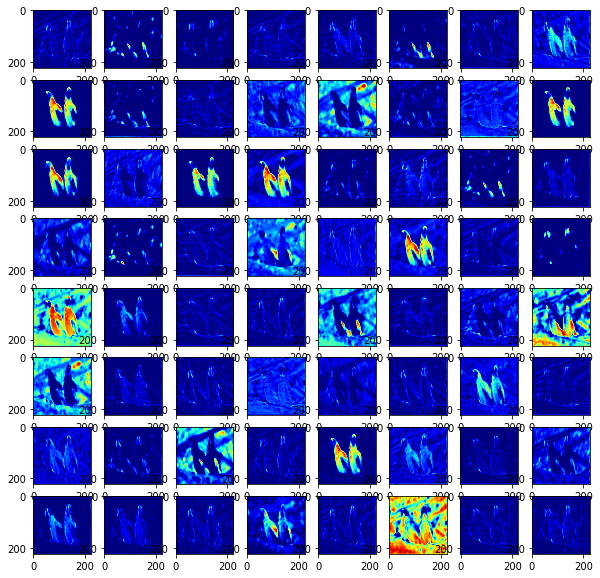

In [9]:
fig = plt.figure(figsize=(10, 10))
Size = 8
ix = 1
for _ in range(Size):
		for _ in range(Size):
				fig.add_subplot(Size, Size, ix)
				plt.imshow(feature_maps[0, :, :, ix-1], cmap="jet")
				ix += 1
# show the figure
plt.show()

# 3.2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


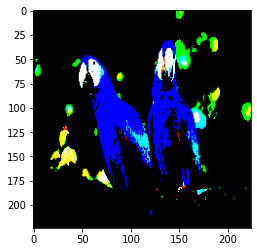

In [10]:
img = cv2.imread(file_path)
# print(img)
img = cv2.resize(img, (224, 224))

#RGB 123.68, 116.799, 103.939
img = img.astype("float")
#BGR
img_mean = [103.939, 116.799, 123.68]
for h in range(0,224):
  for w in range(0, 224):
    for c in range(0, 3):
      img[h][w][c] = img[h][w][c] - img_mean[c]

plt.imshow(img)

# 3.3

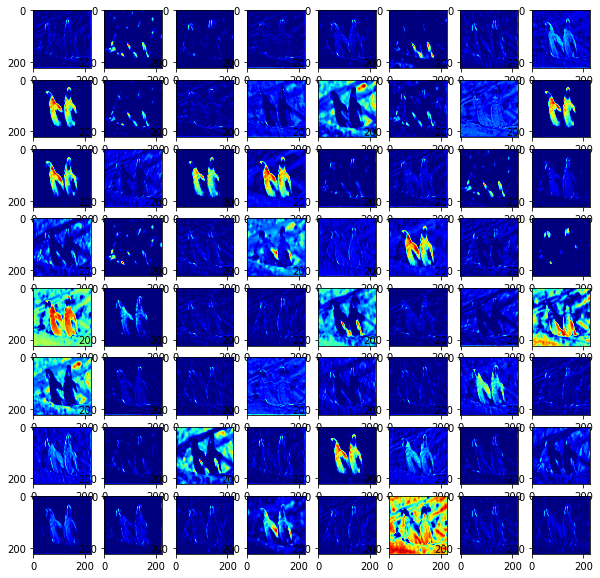

In [11]:
Size = 8
fig = plt.figure(figsize=(10, 10))
Img_result = np.zeros((224,224,3))

for l in range(0, 64):
  for c in range(0, 3):
    Img_result[: , :, c] = signal.convolve2d( img[ : , : , c], kernels[: , : , c, l] , mode='same',boundary='fill', fillvalue=0)
  Image_sum = Img_result[ : , : , 0] + Img_result[ : , : , 1] + Img_result[ : , : , 2]
  # print(Image_sum)

  Image_sum = np.where(Image_sum < 0, 0, Image_sum)
  # print(Image_sum)
  fig.add_subplot(Size, Size, l+1)
  plt.imshow(Image_sum, cmap="jet")